In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import random

In [2]:
Arm1 = np.random.normal(90, 10, 2000)
Arm2 = np.random.normal(100, 20, 2000)
Arm3 = np.random.normal(120, 20, 2000)

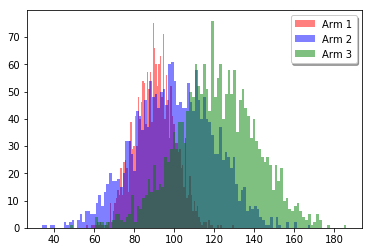

In [3]:
plt.hist(Arm1, bins=100, alpha = 0.5, color="red", label = "Arm 1")
plt.hist(Arm2, bins=100, alpha = 0.5, color="blue", label = "Arm 2")
plt.hist(Arm3, bins=100, alpha = 0.5, color="green", label = "Arm 3")
plt.legend(loc='upper right', shadow=True)
plt.show()

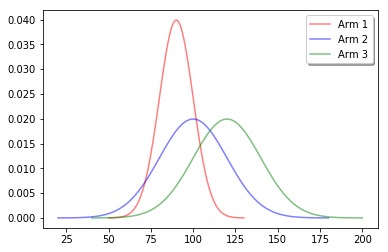

In [4]:
def Arm(mu, sd):
    x = np.linspace(mu - 4*sd, mu + 4*sd, 100)
    return(x)
    
Arm1 = Arm(90, 10)
Arm2 = Arm(100, 20)
Arm3 = Arm(120, 20)
plt.plot(Arm1,mlab.normpdf(Arm1, 90, 10), alpha = 0.5, color="red", label = "Arm 1")
plt.plot(Arm2,mlab.normpdf(Arm2, 100, 20), alpha = 0.5, color="blue", label = "Arm 2")
plt.plot(Arm3,mlab.normpdf(Arm3, 120, 20), alpha = 0.5, color="green", label = "Arm 3")
plt.legend(loc='upper right', shadow=True)
plt.show()

In [5]:
def epsilon_greedy_MAB(N = 2000, epsilon = 0.01):
    rewards = []
    Arm1_r = []
    Arm2_r = []
    Arm3_r = []
    E = {'E1': 0, 'E2': 0, 'E3': 0}
    L = list(range(1, N+1))
    random.shuffle(L) 
    L1 = L[: int((1-epsilon)*N)]
    L2 = L[int((1-epsilon)*N):]
    R = np.random.normal(90, 10, 1)
    Arm1_r.append(R)
    rewards.append(R)
    Arm1_E = np.mean(Arm1_r)
    E["E1"] = Arm1_E
    for i in range(N+1):
        if i in L1[1:]:
            action = max(E, key=E.get)
            if action == "E1":
                R = np.random.normal(90, 10, 1)
                Arm1_r.append(R)
                rewards.append(R)
                Arm1_E = np.mean(Arm1_r)
                E[action] = Arm1_E
            if action == "E2":
                R = np.random.normal(100, 20, 1)
                Arm2_r.append(R)
                rewards.append(R)
                Arm2_E = np.mean(Arm2_r)
                E[action] = Arm2_E
            if action == "E3":
                R = np.random.normal(120, 20, 1)
                Arm3_r.append(R)
                rewards.append(R)
                Arm3_E = np.mean(Arm3_r)
                E[action] = Arm3_E
        if i in L2:
            action = random.choice(["E1","E2","E3"])
            if action == "E1":
                R = np.random.normal(90, 10, 1)
                Arm1_r.append(R)
                rewards.append(R)
                Arm1_E = np.mean(Arm1_r)
                E[action] = Arm1_E
            if action == "E2":
                R = np.random.normal(100, 20, 1)
                Arm2_r.append(R)
                rewards.append(R)
                Arm2_E = np.mean(Arm2_r)
                E[action] = Arm2_E
            if action == "E3":
                R = np.random.normal(120, 20, 1)
                Arm3_r.append(R)
                rewards.append(R)
                Arm3_E = np.mean(Arm3_r)
                E[action] = Arm3_E
    return(E, Arm1_r, Arm2_r, Arm3_r, rewards)

In [6]:
E, Arm1_r, Arm2_r, Arm3_r, rewards = epsilon_greedy_MAB(N = 2000, epsilon = 0.01)
print("Number of times Arm_1 is pulled:", len(Arm1_r))
print("Number of times Arm_2 is pulled:", len(Arm2_r))
print("Number of times Arm_3 is pulled:", len(Arm3_r))
print("Total reward:", np.mean(rewards))

Number of times Arm_1 is pulled: 223
Number of times Arm_2 is pulled: 3
Number of times Arm_3 is pulled: 1774
Total reward: 116.273625748


In [7]:
# def rescue_code(function):
#     import inspect
#     get_ipython().set_next_input("".join(inspect.getsourcelines(function)[0]))
# rescue_code(epsilon_greedy_MAB)

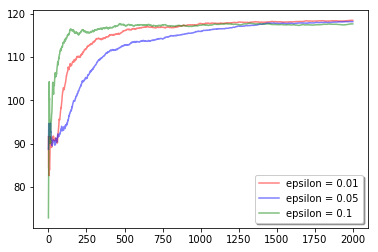

In [8]:
E, Arm1_r, Arm2_r, Arm3_r, rewards1 = epsilon_greedy_MAB(N = 2000, epsilon = 0.01)
E, Arm1_r, Arm2_r, Arm3_r, rewards2 = epsilon_greedy_MAB(N = 2000, epsilon = 0.05)
E, Arm1_r, Arm2_r, Arm3_r, rewards3 = epsilon_greedy_MAB(N = 2000, epsilon = 0.1)
rewards1 = pd.Series(rewards1)
g1 = rewards1.expanding().mean()
rewards2 = pd.Series(rewards2)
g2 = rewards2.expanding().mean()
rewards3 = pd.Series(rewards3)
g3 = rewards3.expanding().mean()
plt.plot(g1, alpha = 0.5, color="red", label = "epsilon = 0.01")
plt.plot(g2, alpha = 0.5, color="blue", label = "epsilon = 0.05")
plt.plot(g3, alpha = 0.5, color="green", label = "epsilon = 0.1")
plt.legend(loc='lower right', shadow=True)
plt.show()